In [3]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os




# Data Augmentation

In [4]:
# Data_Directory = './Data/15_Nov_Readings'
Data_Directory = './Data/25-02-04'
# file = './Data_1/ble_datalog_2024-09-12_16-05-30.csv'

In [ ]:
import re

def convert_log_to_dict(log_string):
    # Regular expression to extract the necessary information
    pattern = r"\d+\. (ble_datalog__Rx_\d__\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}) \(grid (\d+),(\d+)\)"
    matches = re.findall(pattern, log_string)

    # Constructing the dictionary in the desired format
    result = {}
    for match in matches:
        filename = f"{match[0]}.csv"
        grid_coordinates = (int(match[1]), int(match[2]))
        result[filename] = grid_coordinates

    return result

# Input log string
log_string = """

1. ble_datalog__Rx_0__2025-02-04_04-07-46 (grid 0,0)
2. ble_datalog__Rx_2__2025-02-04_04-07-46 (grid 0,1)
3. ble_datalog__Rx_0__2025-02-04_05-10-05 (grid 0,2)
4. ble_datalog__Rx_1__2025-02-04_05-43-22 (grid 0,3)
5. ble_datalog__Rx_2__2025-02-04_05-43-22 (grid 0,4)
6. ble_datalog__Rx_1__2025-02-04_06-12-38 (grid 0,5)
7. ble_datalog__Rx_2__2025-02-04_06-41-41 (grid 0,6)
8. ble_datalog__Rx_1__2025-02-04_06-41-41 (grid 0,7)
9. ble_datalog__Rx_1__2025-02-04_04-07-46 (grid 1,0)
10. ble_datalog__Rx_1__2025-02-04_05-10-05 (grid 1,1)
11. ble_datalog__Rx_2__2025-02-04_05-10-05 (grid 1,2)
12. ble_datalog__Rx_0__2025-02-04_05-43-22 (grid 1,3)
13. ble_datalog__Rx_0__2025-02-04_06-12-38 (grid 1,4)
14. ble_datalog__Rx_2__2025-02-04_06-12-38 (grid 1,5)
15. ble_datalog__Rx_0__2025-02-04_07-13-56 (grid 1,6)
16. ble_datalog__Rx_0__2025-02-04_06-41-41 (grid 1,7)
17. ble_datalog__Rx_1__2025-02-04_07-13-56 (grid 2,6)
18. ble_datalog__Rx_2__2025-02-04_07-13-56 (grid 2,7)
19. ble_datalog__Rx_1__2025-02-04_08-49-07 (grid 4,4)
20. ble_datalog__Rx_1__2025-02-04_08-29-14 (grid 4,5)
21. ble_datalog__Rx_0__2025-02-04_08-29-14 (grid 4,6)
22. ble_datalog__Rx_2__2025-02-04_08-01-36 (grid 4,7)
23. ble_datalog__Rx_0__2025-02-04_09-11-34 (grid 5,2)
24. ble_datalog__Rx_2__2025-02-04_08-49-07 (grid 5,3)
25. ble_datalog__Rx_0__2025-02-04_08-49-07 (grid 5,4)
26. ble_datalog__Rx_2__2025-02-04_08-29-14 (grid 5,5)
27. ble_datalog__Rx_0__2025-02-04_08-01-36 (grid 5,6)
28. ble_datalog__Rx_1__2025-02-04_08-01-36 (grid 5,7)

29. ble_datalog__Rx_0__2025-02-04_11-18-33 (grid 7,7)
30. ble_datalog__Rx_0__2025-02-04_12-09-11 (grid 6,5)
31. ble_datalog__Rx_0__2025-02-04_13-04-37 (grid 7,4)
32. ble_datalog__Rx_0__2025-02-04_13-31-48 (grid 6,2)
33. ble_datalog__Rx_0__2025-02-04_14-15-53 (grid 7,1)
34. ble_datalog__Rx_0__2025-02-04_14-46-12 (grid 5,0)
35. ble_datalog__Rx_1__2025-02-04_11-18-33 (grid 7,6)
36. ble_datalog__Rx_1__2025-02-04_12-09-11 (grid 7,5)
37. ble_datalog__Rx_1__2025-02-04_13-04-37 (grid 7,3)
38. ble_datalog__Rx_1__2025-02-04_13-31-48 (grid 7,2)
39. ble_datalog__Rx_1__2025-02-04_14-15-53 (grid 7,0)
40. ble_datalog__Rx_1__2025-02-04_14-46-12 (grid 6,0)
41. ble_datalog__Rx_2__2025-02-04_11-18-33 (grid 6,7)
42. ble_datalog__Rx_2__2025-02-04_12-09-11 (grid 6,6)
43. ble_datalog__Rx_2__2025-02-04_13-04-37 (grid 6,4)
44. ble_datalog__Rx_2__2025-02-04_13-31-48 (grid 6,3)
45. ble_datalog__Rx_2__2025-02-04_14-15-53 (grid 6,1)
46. ble_datalog__Rx_2__2025-02-04_14-46-12 (grid 5,1)

47. ble_datalog__Rx_0__2025-02-04_12-06-49 (grid 3,0)
48. ble_datalog__Rx_0__2025-02-04_13-08-25 (grid 3,2)
49. ble_datalog__Rx_0__2025-02-04_13-33-54 (grid 3,4)
50. ble_datalog__Rx_0__2025-02-04_14-00-17 (grid 3,6)
51. ble_datalog__Rx_0__2025-02-04_14-27-54 (grid 2,4)
52. ble_datalog__Rx_0__2025-02-04_14-54-17 (grid 2,2)
53. ble_datalog__Rx_0__2025-02-04_15-20-11 (grid 2,0)
54. ble_datalog__Rx_0__2025-02-04_15-43-46 (grid 4,0)
55. ble_datalog__Rx_0__2025-02-04_16-09-02 (grid 4,2)
56. ble_datalog__Rx_1__2025-02-04_12-06-49 (grid 3,1)
57. ble_datalog__Rx_1__2025-02-04_13-08-25 (grid 3,3)
58. ble_datalog__Rx_1__2025-02-04_13-33-54 (grid 3,5)
59. ble_datalog__Rx_1__2025-02-04_14-00-17 (grid 3,7)
60. ble_datalog__Rx_1__2025-02-04_14-27-54 (grid 2,5)
61. ble_datalog__Rx_1__2025-02-04_14-54-17 (grid 2,3)
62. ble_datalog__Rx_1__2025-02-04_15-20-11 (grid 2,1)
63. ble_datalog__Rx_1__2025-02-04_15-43-46 (grid 4,1)
64. ble_datalog__Rx_1__2025-02-04_16-09-02 (grid 4,3)



"""

coord_mapping  = convert_log_to_dict(log_string)

print(f"{{\n    {coord_mapping}\n}}")



{
    {'ble_datalog__Rx_0__2025-02-10_03-01-34.csv': (0, 0), 'ble_datalog__Rx_0__2025-02-10_06-23-17.csv': (1, 1), 'ble_datalog__Rx_0__2025-02-10_06-48-22.csv': (1, 4), 'ble_datalog__Rx_0__2025-02-10_07-30-50.csv': (0, 4), 'ble_datalog__Rx_0__2025-02-10_08-06-33.csv': (1, 6), 'ble_datalog__Rx_0__2025-02-10_08-51-25.csv': (2, 7), 'ble_datalog__Rx_0__2025-02-18_03-53-43.csv': (2, 4), 'ble_datalog__Rx_0__2025-02-18_04-17-55.csv': (2, 2), 'ble_datalog__Rx_0__2025-02-18_04-42-05.csv': (2, 0), 'ble_datalog__Rx_0__2025-02-18_05-12-25.csv': (5, 6), 'ble_datalog__Rx_1__2025-02-10_03-01-34.csv': (0, 1), 'ble_datalog__Rx_1__2025-02-10_06-23-17.csv': (1, 2), 'ble_datalog__Rx_1__2025-02-10_06-48-22.csv': (1, 3), 'ble_datalog__Rx_1__2025-02-10_07-30-50.csv': (1, 5), 'ble_datalog__Rx_1__2025-02-10_08-06-33.csv': (0, 6), 'ble_datalog__Rx_1__2025-02-10_08-51-25.csv': (1, 7), 'ble_datalog__Rx_1__2025-02-18_03-53-43.csv': (2, 1), 'ble_datalog__Rx_1__2025-02-18_04-17-55.csv': (2, 3), 'ble_datalog__Rx_1__2

In [6]:
def normalize_time_columns(df, time_columns):
    for col in time_columns:
        df[col] = pd.to_datetime(df[col], format='%H-%M-%S')
        min_time = df[col].min()
        df[col] = (df[col] - min_time).dt.total_seconds()
    return df

# Function to process each CSV file
def process_csv(file_path, x_coord, y_coord):
    # Read the CSV file into a DataFrame
    data = pd.read_csv(file_path)

    # Add X_Coord and Y_Coord from mapping
    data['X_Coord'] = x_coord
    data['Y_Coord'] = y_coord

    # Identify and normalize time columns
    time_columns = [col for col in data.columns if 'Time' in col]
    data = normalize_time_columns(data, time_columns)

    return data

# Main function to process all CSV files in a directory
def combine_all_csvs(directory, coord_mapping):
    combined_data = []  # List to store individual DataFrames
    
    for filename in coord_mapping.keys():
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)

            # Get X_Coord and Y_Coord from the mapping
            if filename in coord_mapping:
                x_coord, y_coord = coord_mapping[filename]
            else:
                # Default coordinates if not in the mapping
                x_coord, y_coord = (0, 0)

            # Process CSV and add to the list
            data = process_csv(file_path, x_coord, y_coord)
            combined_data.append(data)

    # Concatenate all DataFrames into one large DataFrame
    combined_df = pd.concat(combined_data, ignore_index=True)
    return combined_df



In [7]:
combined_df = combine_all_csvs(Data_Directory, coord_mapping)

# Now print the DataFrame
combined_df

,Tx_0 RSSI,Tx_1 RSSI,Tx_2 RSSI,Tx_3 RSSI,Tx_4 RSSI,Tx_5 RSSI,Tx_6 RSSI,Tx_7 RSSI,X_Coord,Y_Coord
0,-54,-77,-74,127,127,-78,127,-71,0,0
1,-54,-77,127,-81,127,127,-81,-71,0,0
2,-54,127,127,127,127,127,127,-71,0,0
3,-54,-77,-74,-82,127,127,-82,-70,0,0
4,-54,-77,127,127,127,-78,-80,-70,0,0
...,...,...,...,...,...,...,...,...,...,...
7389,-70,-69,-80,-65,-79,127,-73,-62,4,3
7390,-70,-70,-84,-65,-79,-84,-74,-61,4,3
7391,-70,-69,-80,-64,-80,127,-76,-61,4,3
7392,-70,-70,-82,-67,-83,-84,-79,-61,4,3


In [8]:
cleaned_df = combined_df

rssi_columns = [col for col in cleaned_df.columns if 'RSSI' in col]
batt_columns = [col for col in cleaned_df.columns if 'Batt' in col]

print(rssi_columns)
print(batt_columns)

# Replace RSSI values greater than 0 with NaN
# cleaned_df[rssi_columns] = cleaned_df[rssi_columns].where(cleaned_df[rssi_columns] <= 0, np.nan)

# Replace Battery values less than 0 with NaN
cleaned_df[batt_columns] = cleaned_df[batt_columns].where(cleaned_df[batt_columns] >= 0, np.nan)
# cleaned_df = cleaned_df.dropna()

cleaned_df


['Tx_0 RSSI', 'Tx_1 RSSI', 'Tx_2 RSSI', 'Tx_3 RSSI', 'Tx_4 RSSI', 'Tx_5 RSSI', 'Tx_6 RSSI', 'Tx_7 RSSI']
[]


,Tx_0 RSSI,Tx_1 RSSI,Tx_2 RSSI,Tx_3 RSSI,Tx_4 RSSI,Tx_5 RSSI,Tx_6 RSSI,Tx_7 RSSI,X_Coord,Y_Coord
0,-54,-77,-74,127,127,-78,127,-71,0,0
1,-54,-77,127,-81,127,127,-81,-71,0,0
2,-54,127,127,127,127,127,127,-71,0,0
3,-54,-77,-74,-82,127,127,-82,-70,0,0
4,-54,-77,127,127,127,-78,-80,-70,0,0
...,...,...,...,...,...,...,...,...,...,...
7389,-70,-69,-80,-65,-79,127,-73,-62,4,3
7390,-70,-70,-84,-65,-79,-84,-74,-61,4,3
7391,-70,-69,-80,-64,-80,127,-76,-61,4,3
7392,-70,-70,-82,-67,-83,-84,-79,-61,4,3


In [9]:

file_path = os.path.join(Data_Directory, 'combined_data.csv')
cleaned_df.to_csv(file_path, index=False)

print(f"Data saved successfully to {file_path}")

Data saved successfully to ./Data/25-02-04\combined_data.csv


#### Data visualisation of raw data

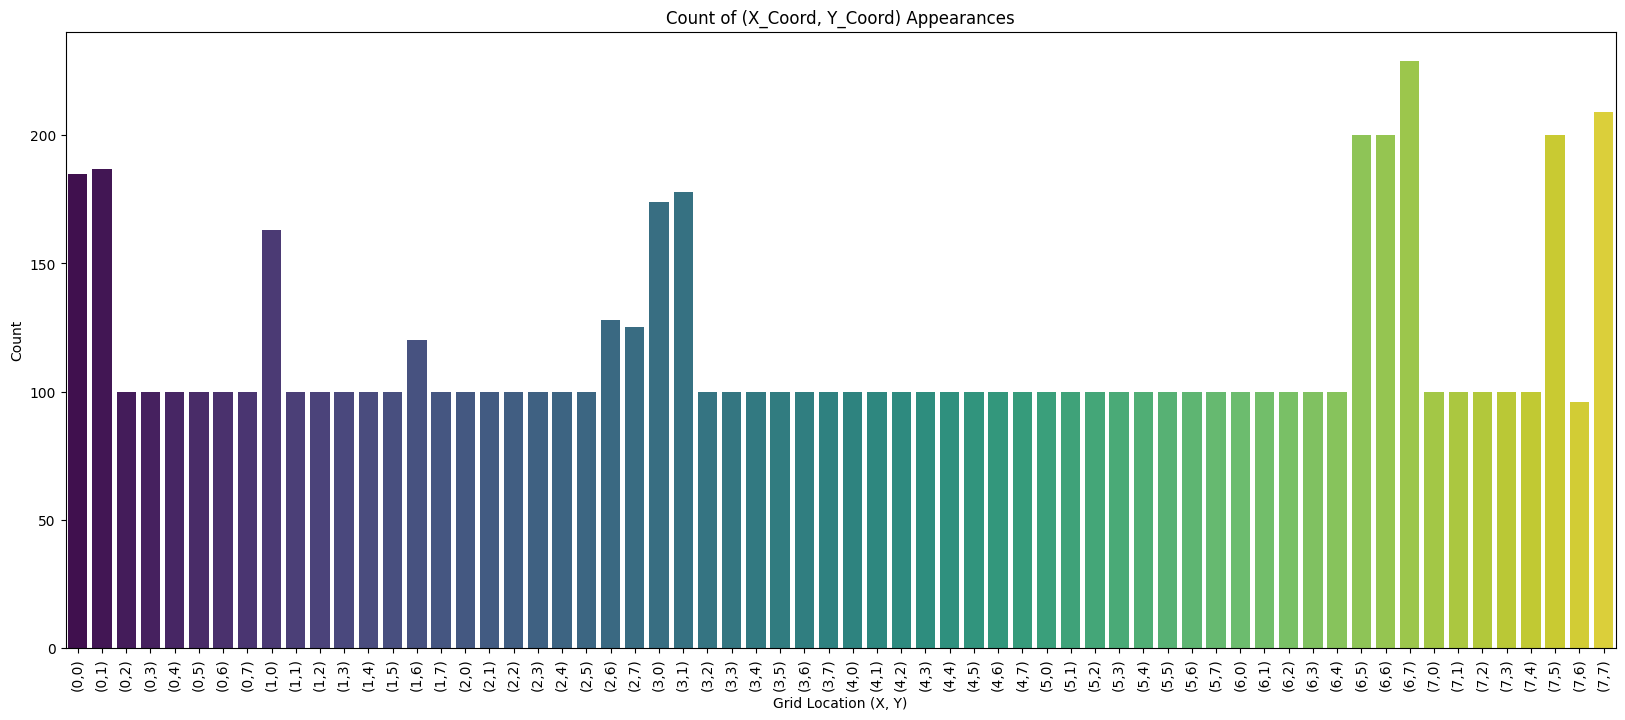

In [45]:
import seaborn as sns
# Count appearances of (X_Coord, Y_Coord) pairs
x_coords = np.arange(8)  # 0 to 7
y_coords = np.arange(8)  # 0 to 7
all_locations = pd.DataFrame([(x, y) for x in x_coords for y in y_coords], columns=['X_Coord', 'Y_Coord'])

# Count occurrences of (X_Coord, Y_Coord) in combined_df
count_data = combined_df.groupby(['X_Coord', 'Y_Coord']).size().reset_index(name='Count')

# Merge with all possible locations to ensure missing ones are included
count_data = all_locations.merge(count_data, on=['X_Coord', 'Y_Coord'], how='left').fillna(0)

# Convert (X_Coord, Y_Coord) to string labels
count_data['Location'] = count_data.apply(lambda row: f"({row['X_Coord']},{row['Y_Coord']})", axis=1)
count_data['Count'] = count_data['Count'].astype(int)
# Sort for better visualization
count_data = count_data.sort_values(by=['X_Coord', 'Y_Coord'])

# Plot the bar chart
plt.figure(figsize=(20, 8))
sns.barplot(data=count_data, x="Location", y="Count", hue="Location", palette="viridis", legend=False)

plt.xlabel("Grid Location (X, Y)")
plt.ylabel("Count")
plt.title("Count of (X_Coord, Y_Coord) Appearances")
plt.xticks(rotation=90)  

plt.savefig('./figures/Test_Data.png')
plt.show()

## Calculating average in RSSI and Batt


In [11]:
def create_avg_df(combined_df):
    # Group by X_Coord and Y_Coord
    combined_df = combined_df.drop([col for col in combined_df.columns if 'Time' in col], axis=1)

    grouped = combined_df.groupby(['X_Coord', 'Y_Coord']).mean().reset_index()

    # Rename columns to reflect that these are averages
    avg_columns = {col: col.replace('RSSI', 'RSSI_Avg').replace('Batt', 'Batt_Avg') for col in grouped.columns if 'RSSI' in col or 'Batt' in col}
    
    # Apply the renaming to the grouped DataFrame
    grouped.rename(columns=avg_columns, inplace=True)
    
    return grouped

In [12]:
avg_df = create_avg_df(combined_df)
data = avg_df
data

,X_Coord,Y_Coord,Tx_0 RSSI_Avg,Tx_1 RSSI_Avg,Tx_2 RSSI_Avg,Tx_3 RSSI_Avg,Tx_4 RSSI_Avg,Tx_5 RSSI_Avg,Tx_6 RSSI_Avg,Tx_7 RSSI_Avg
0,0,0,-52.221622,-18.870270,16.670270,12.643243,118.967568,13.156757,-41.664865,-48.902703
1,0,1,95.363636,-3.459893,2.898396,-4.705882,87.245989,10.903743,-26.839572,-36.459893
2,0,2,-40.820000,99.660000,-30.060000,-27.280000,82.700000,-47.010000,-47.440000,-19.510000
3,0,3,112.390000,-47.780000,-42.070000,-19.870000,16.100000,-8.470000,41.050000,-0.080000
4,0,4,-27.610000,-51.340000,-36.580000,-22.270000,-32.990000,-18.610000,-21.300000,43.100000
...,...,...,...,...,...,...,...,...,...,...
59,7,3,120.720000,-52.140000,-32.740000,18.050000,-24.760000,-46.650000,-8.410000,-14.280000
60,7,4,-53.900000,-53.210000,-30.540000,-1.280000,-41.910000,-40.440000,-11.130000,-19.150000
61,7,5,-51.250000,1.205000,22.505000,-12.490000,-55.125000,-0.715000,-35.605000,-46.010000
62,7,6,62.385417,-22.916667,50.635417,15.906250,-14.218750,-12.729167,-23.072917,-22.625000


In [13]:
batt_columns = [col for col in data.columns if 'Batt' in col]

RSSI_columns = data.drop(columns=batt_columns)

pd.set_option('display.max_rows', 100)  # Adjust as needed
pd.set_option('display.max_columns', 100)  # Adjust as needed
pd.set_option('display.max_colwidth', None)
RSSI_columns.head(64)

,X_Coord,Y_Coord,Tx_0 RSSI_Avg,Tx_1 RSSI_Avg,Tx_2 RSSI_Avg,Tx_3 RSSI_Avg,Tx_4 RSSI_Avg,Tx_5 RSSI_Avg,Tx_6 RSSI_Avg,Tx_7 RSSI_Avg
0,0,0,-52.221622,-18.870270,16.670270,12.643243,118.967568,13.156757,-41.664865,-48.902703
1,0,1,95.363636,-3.459893,2.898396,-4.705882,87.245989,10.903743,-26.839572,-36.459893
2,0,2,-40.820000,99.660000,-30.060000,-27.280000,82.700000,-47.010000,-47.440000,-19.510000
3,0,3,112.390000,-47.780000,-42.070000,-19.870000,16.100000,-8.470000,41.050000,-0.080000
4,0,4,-27.610000,-51.340000,-36.580000,-22.270000,-32.990000,-18.610000,-21.300000,43.100000
5,0,5,15.500000,-39.350000,-31.610000,-14.580000,72.740000,13.870000,-36.680000,-13.900000
6,0,6,-36.710000,-28.860000,-57.380000,14.600000,3.860000,18.260000,8.900000,-20.210000
7,0,7,13.020000,-12.740000,-50.290000,32.100000,114.330000,22.840000,-8.060000,16.400000
8,1,0,-44.374233,93.595092,39.392638,-0.380368,103.773006,21.331288,87.245399,58.196319
9,1,1,-57.250000,-47.700000,-3.040000,31.250000,-27.650000,-40.220000,-6.650000,-21.570000
